In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."


(60000, 28, 28)
(10000, 28, 28)


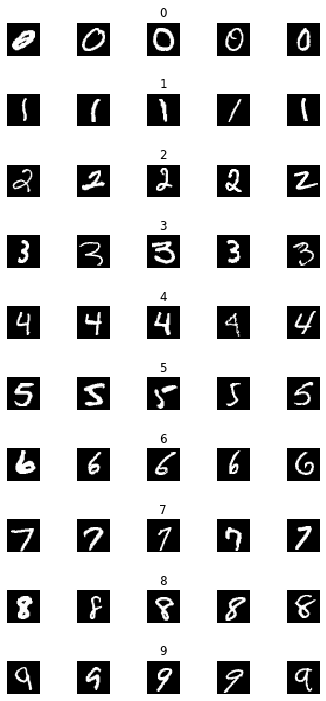

In [4]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


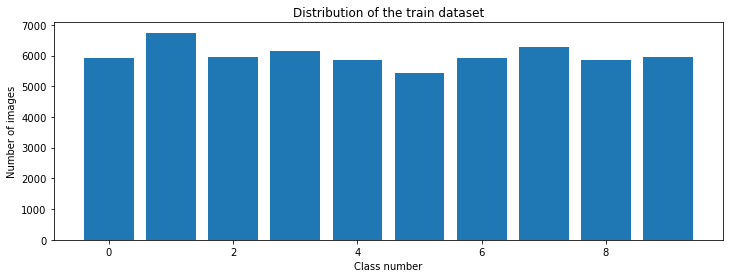

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [12]:
#define the Lenet Model
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape = (28,28,1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(15, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
model = leNet_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [19]:
h = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 19s 346us/step - loss: 0.2390 - accuracy: 0.9272 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 2/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.0419 - val_accuracy: 0.9875
Epoch 3/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0409 - val_accuracy: 0.9875
Epoch 4/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 5/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0350 - val_accuracy: 0.9895
Epoch 6/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0532 - val_accuracy: 0.9852
Epoch 7/10
54000/54000 [==============================] - 3s 59us/s

Text(0.5, 1.0, 'loss')

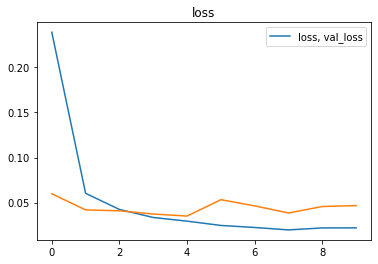

In [20]:
plt.plot(h.history['loss'])
plt.plot(h.hstory['val_loss'])
plt.legend(['loss, val_loss'])
plt.title('loss')

Text(0.5, 1.0, 'acc')

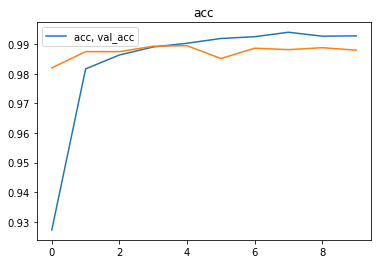

In [21]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['acc, val_acc'])
plt.title('acc')

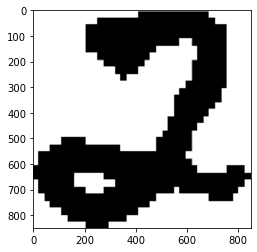

In [26]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

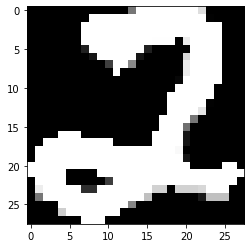

In [27]:
import cv2 

img_array = np.asarray(img) #input data is converted into an array
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,  cmap=plt.get_cmap("gray"))

In [28]:
image = image/255
image = image.reshape(1, 28,28,1)
prediction = model.predict_classes(image)
print("Prediction:", str(prediction))

Prediction: [2]
